In [8]:
import pandas as pd
from urllib import request
import ssl

url = 'https://www.investopedia.com/ask/answers/071414/whats-difference-between-moving-average-and-weighted-moving-average.asp'
context = ssl._create_unverified_context()
response = request.urlopen(url, context=context)
html = response.read()

In [9]:
table = pd.read_html(html)

In [11]:
print(table[0].to_html(index=False))

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>0</th>
      <th>1</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Date</td>
      <td>Closing Price of AAPL</td>
    </tr>
    <tr>
      <td>June 26</td>
      <td>$22.72</td>
    </tr>
    <tr>
      <td>June 25</td>
      <td>$22.59</td>
    </tr>
    <tr>
      <td>June 24</td>
      <td>$22.57</td>
    </tr>
    <tr>
      <td>June 23</td>
      <td>$22.71</td>
    </tr>
    <tr>
      <td>June 20</td>
      <td>$22.73</td>
    </tr>
  </tbody>
</table>


In [8]:
import numpy as np
from sklearn.linear_model import LinearRegression
import plotly.express as px

In [22]:
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
x1 = np.array([5, 15, 25, 35, 45, 55])
y = np.array([5, 20, 14, 32, 22, 38])

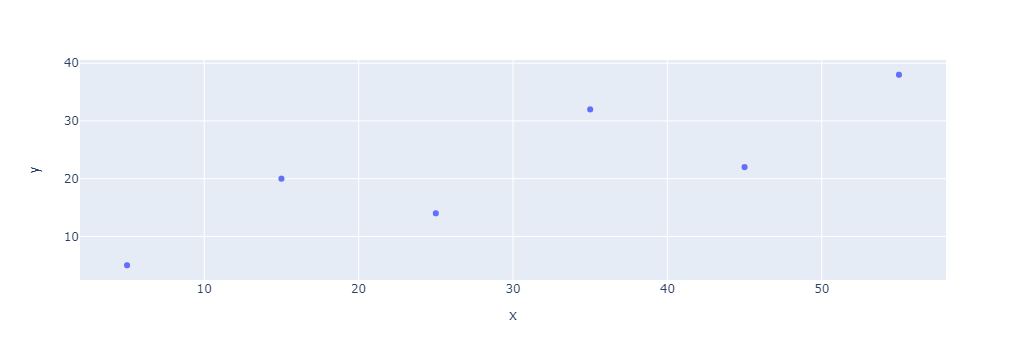

In [23]:
fig = px.scatter(x=x1, y=y)
fig.show()

In [24]:
model = LinearRegression().fit(x,y)

In [25]:
r_sq = model.score(x,y)

In [26]:
print('coefficient of determination: ', r_sq)
print('intercept: ', model.intercept_)
print('slope: ', model.coef_)

coefficient of determination:  0.715875613747954
intercept:  5.633333333333329
slope:  [0.54]


In [29]:
new_model = LinearRegression().fit(x, y.reshape((-1,1)))
print('intercept: ', new_model.intercept_)
print('slope: ', new_model.coef_)

intercept:  [5.63333333]
slope:  [[0.54]]


In [27]:
y_pred = model.predict(x)

In [28]:
y_pred

array([ 8.33333333, 13.73333333, 19.13333333, 24.53333333, 29.93333333,
       35.33333333])

In [30]:
y_pred1 = model.intercept_ + model.coef_ *x
y_pred

array([ 8.33333333, 13.73333333, 19.13333333, 24.53333333, 29.93333333,
       35.33333333])

In [31]:
x_new = np.arange(5).reshape((-1,1))
y_new = model.predict(x_new)
y_new

array([5.63333333, 6.17333333, 6.71333333, 7.25333333, 7.79333333])

In [32]:
x = [[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]]
y = [4, 5, 20, 14, 32, 22, 38, 43]
x, y = np.array(x), np.array(y)
x

array([[ 0,  1],
       [ 5,  1],
       [15,  2],
       [25,  5],
       [35, 11],
       [45, 15],
       [55, 34],
       [60, 35]])

In [33]:
y

array([ 4,  5, 20, 14, 32, 22, 38, 43])

In [34]:
model = LinearRegression().fit(x,y)
print('coefficient of determination: ', model.score(x,y))
print('intercept: ', model.intercept_)
print('slope: ', model.coef_)

coefficient of determination:  0.8615939258756775
intercept:  5.52257927519819
slope:  [0.44706965 0.25502548]


In [35]:
y_pred = model.predict(x)
y_pred

array([ 5.77760476,  8.012953  , 12.73867497, 17.9744479 , 23.97529728,
       29.4660957 , 38.78227633, 41.27265006])

In [39]:
y_pred1 = model.intercept_ + np.sum(model.coef_ * x, axis=1)
print('predicted response: ', y_pred1, sep='\n')

predicted response: 
[ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]


In [40]:
x_new = np.arange(10).reshape((-1, 2))
y_new = model.predict(x_new)
y_new

array([ 5.77760476,  7.18179502,  8.58598528,  9.99017554, 11.3943658 ])

In [37]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [38]:
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1,1))
y = np.array([15, 11, 2, 8, 25, 32])

In [39]:
# x_ = PolynomialFeatures(degree=2, include_bias=False).fit(x).fit_transform(x)
transformer = PolynomialFeatures(degree=2, include_bias=False)
transformer.fit(x)
x_ = transformer.fit_transform(x)

In [40]:
x_

array([[   5.,   25.],
       [  15.,  225.],
       [  25.,  625.],
       [  35., 1225.],
       [  45., 2025.],
       [  55., 3025.]])

In [41]:
model = LinearRegression().fit(x_, y)

In [42]:
print('coefficient of determination: ', model.score(x_, y))
print('intercept: ', model.intercept_)
print('coefficient: ', model.coef_)

coefficient of determination:  0.8908516262498564
intercept:  21.372321428571425
coefficient:  [-1.32357143  0.02839286]


In [43]:
x1_ = PolynomialFeatures(degree=2, include_bias=True).fit_transform(x)
print(x1_)

[[1.000e+00 5.000e+00 2.500e+01]
 [1.000e+00 1.500e+01 2.250e+02]
 [1.000e+00 2.500e+01 6.250e+02]
 [1.000e+00 3.500e+01 1.225e+03]
 [1.000e+00 4.500e+01 2.025e+03]
 [1.000e+00 5.500e+01 3.025e+03]]


In [44]:
model1 = LinearRegression(fit_intercept=False).fit(x1_, y)
print('coefficient of determination: ', model.score(x1_, y))
print('intercept: ', model.intercept_)
print('coefficient: ', model.coef_)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 3)

In [46]:
y_pred = model.predict(x_)
y_pred

array([15.46428571,  7.90714286,  6.02857143,  9.82857143, 19.30714286,
       34.46428571])